<a href="https://colab.research.google.com/github/yaraaldos/Diabetes-risk-prediction/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Part one (data analysis)`**

## Part 1: Data Analysis

In this part, we start by loading the dataset from our GitHub repository and visualizing the basic distributions of the categorical variables **Gender** and **CLASS**. These plots help us understand the balance of the data before preprocessing.





**Uploading data and viewing some samples :**

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

url = "https://raw.githubusercontent.com/yaraaldos/Diabetes-risk-prediction/refs/heads/main/Dataset/Raw_data.csv"
df = pd.read_csv(url) # to upload and read data
df_copy= df.copy() # the one used for for data of cleaning (preprocessed)

print("Loaded shape:", df.shape) # to show the number of columns and rows
print("\nHead:")
print(df.head()) # shows a sample of 5 rows of all coulmns (This step i put to ensure the data loaded correctly)

Loaded shape: (1000, 14)

Head:
    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


**1.1 Five number summery :**

In [112]:
df.describe() # for showing the five number summery (statistical summury)

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


**1.2 Graphs:**

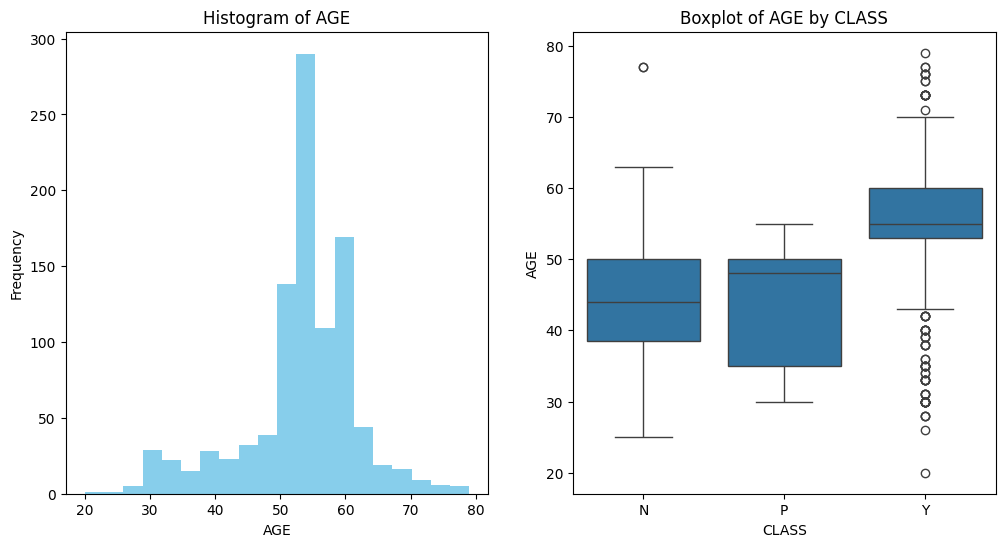

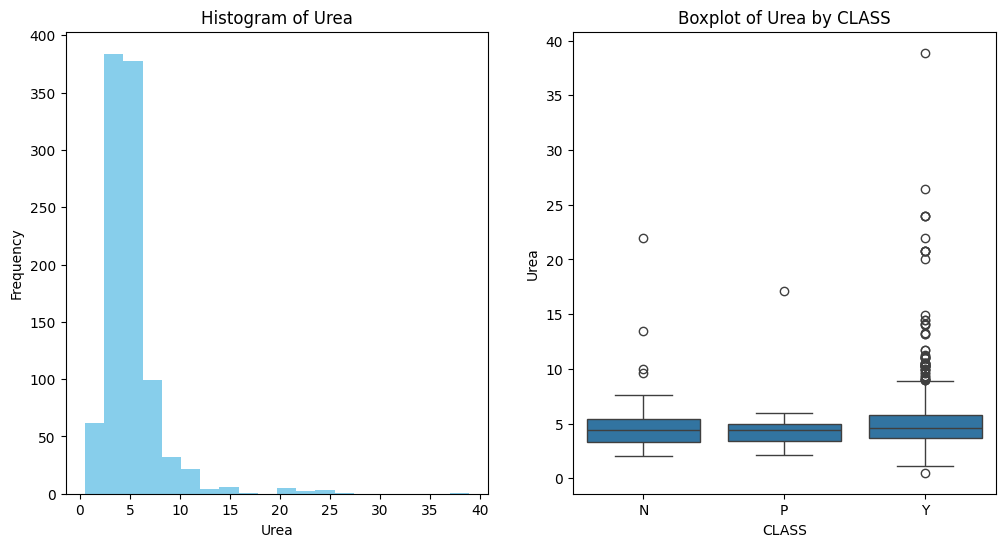

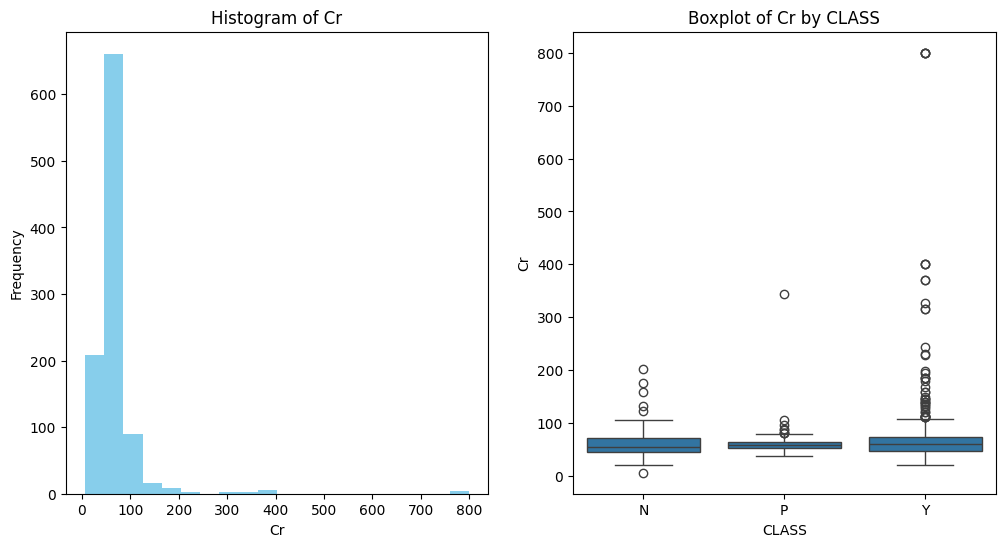

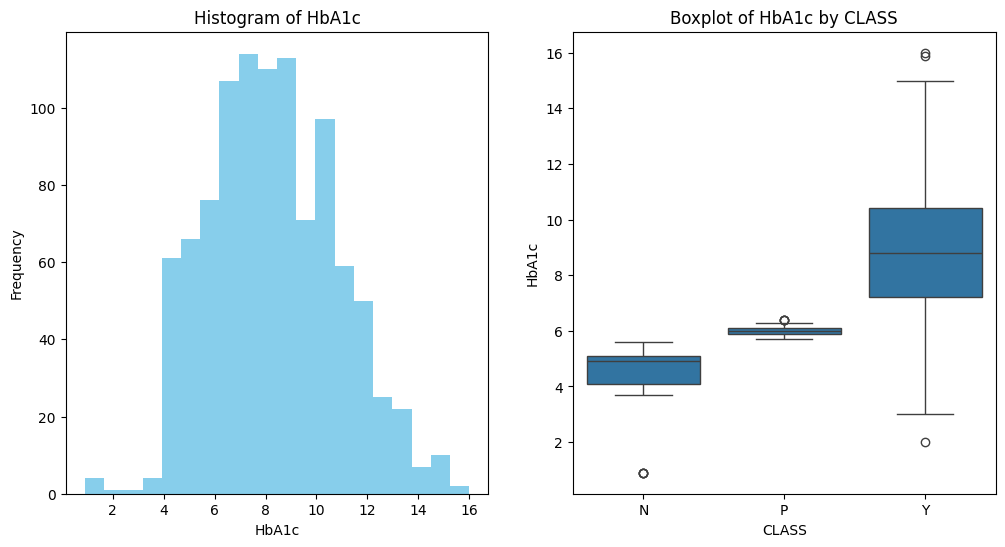

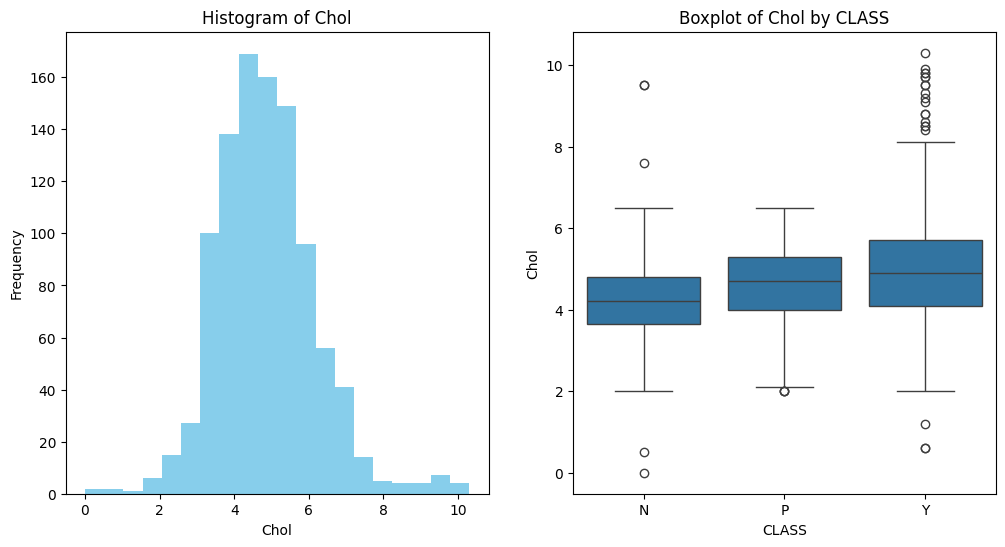

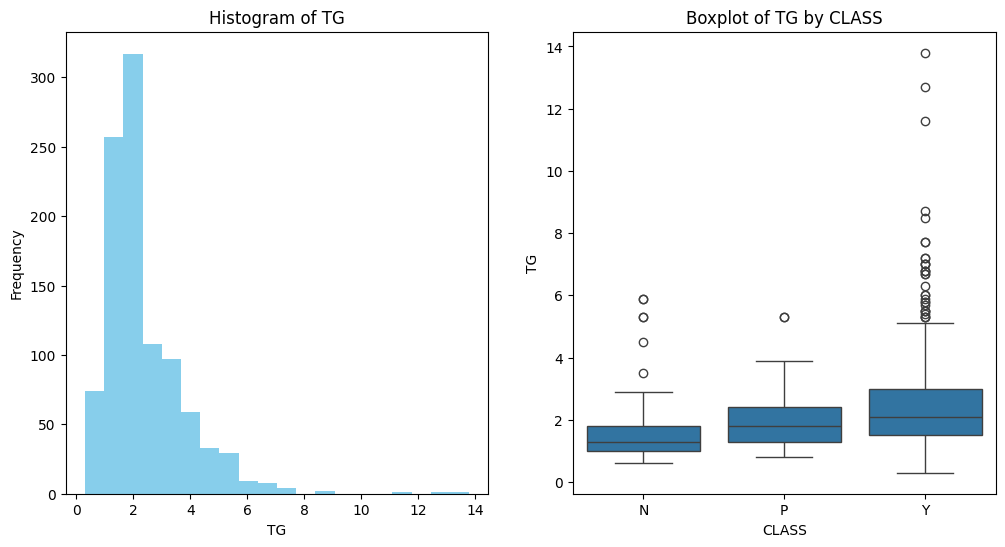

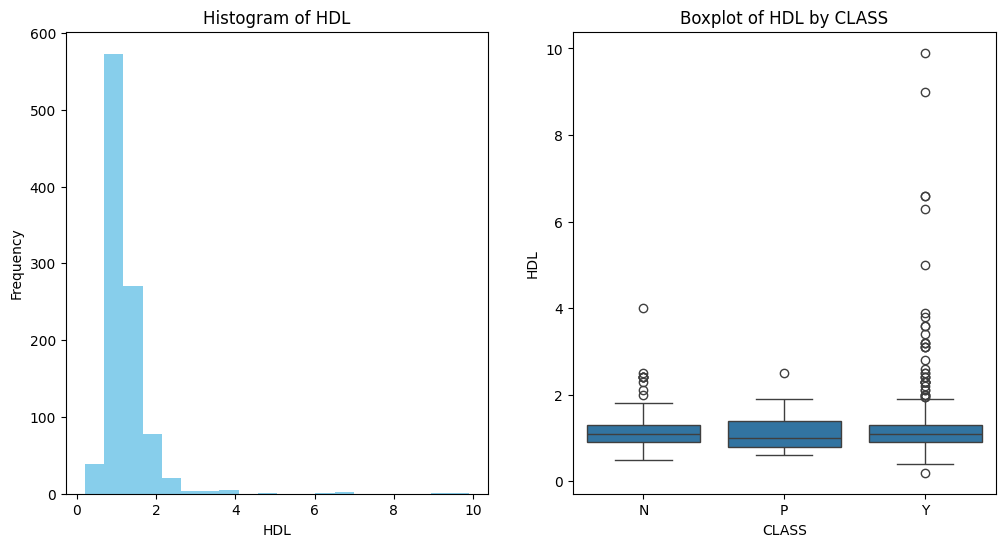

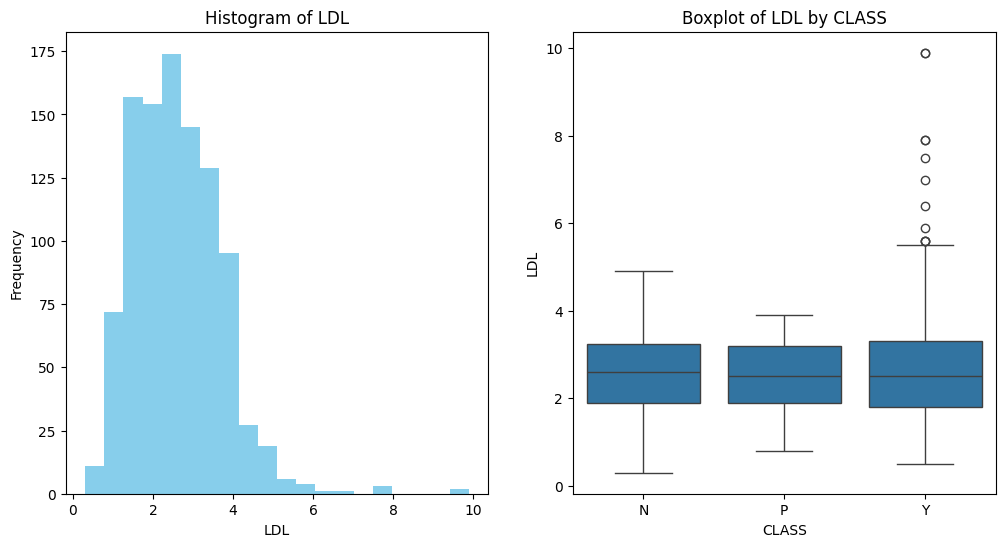

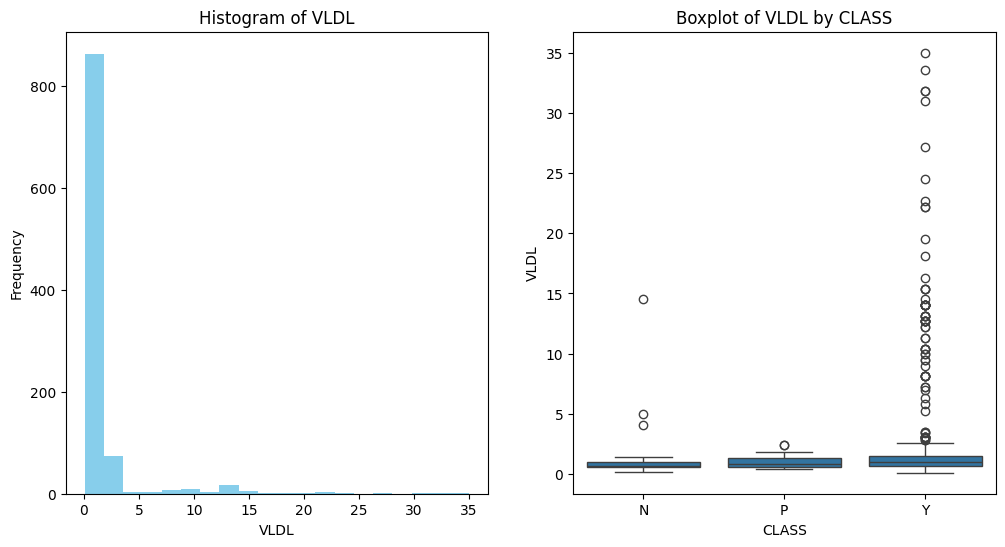

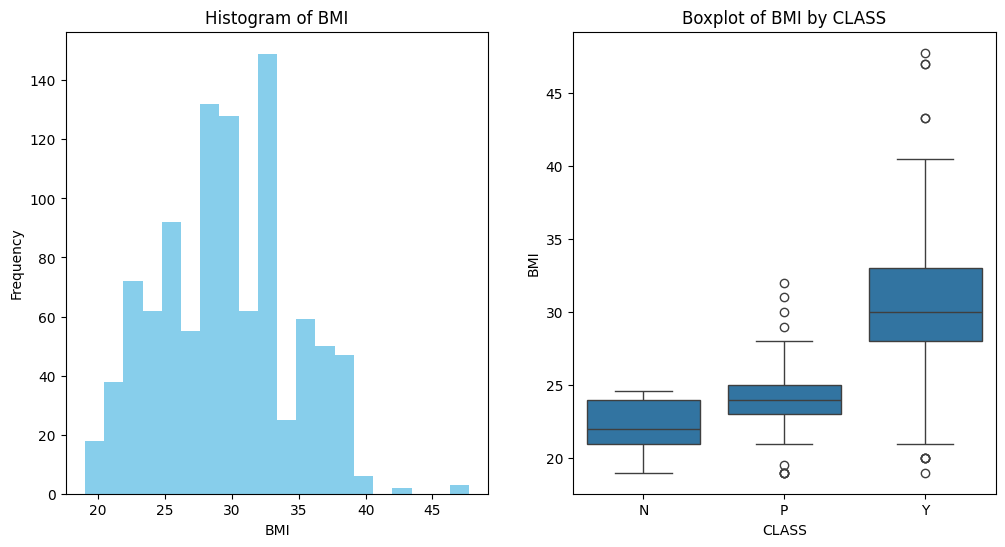

In [113]:

import seaborn as sns

df['CLASS'] = df['CLASS'].str.strip().str.upper()

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ["ID", "No_Pation"]]


for col in numeric_cols:
    vals = df[col].dropna()

    plt.figure(figsize=(12,6))

     #Histogram
    plt.subplot(1, 2, 1)
    plt.hist(vals, bins=20, color="skyblue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

     # box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x="CLASS", y=col, data=df)
    plt.title(f"Boxplot of {col} by CLASS")
    plt.xlabel("CLASS")
    plt.ylabel(col)



plt.show()




 **graph description**

--------------------------------------------------------------------------------
🔹AGE
The histogram of AGE shows that most values are centered in the middle range, with a fairly balanced spread. The boxplot indicates the presence of a few outliers, mainly within the “Y” class. During preprocessing, these outliers will be handled, and normalization will help maintain consistent scaling among features.

--------------------------------------------------------------------------------

🔹 UREA
The histogram of UREA shows a strong right skew, where most values are clustered near the lower end. The boxplot reveals several outliers spread across the classes. This attribute will require both outlier handling and normalization to balance the distribution and reduce the skew effect.

--------------------------------------------------------------------------------

🔹 CR
The histogram of CR displays heavy skewness, with most data points near smaller values and a few extremely high ones. The boxplot highlights many outliers, especially in the “Y” class. This feature clearly requires outlier treatment and normalization to stabilize the range and minimize distortion.

--------------------------------------------------------------------------------

🔹 HbA1C
The histogram of HbA1C appears moderately distributed, though slightly skewed. The boxplot shows some visible outliers in the “Y” class. It will benefit from normalization and light outlier adjustment to ensure balanced scaling across all classes.

--------------------------------------------------------------------------------

🔹 CHOL
The histogram of CHOL shows a slightly right-skewed distribution, where most values are centered but extend slightly toward higher levels. The boxplot reveals some visible outliers, especially within the “Y” class. This indicates moderate variation and suggests that normalization and outlier handling will help improve data consistency during preprocessing.

--------------------------------------------------------------------------------

🔹 TG
The histogram of TG is strongly skewed to the right, with most values concentrated at low levels. The boxplot shows numerous outliers, particularly in the “Y” class. This variable clearly requires outlier handling and normalization during preprocessing to improve balance and consistency.

--------------------------------------------------------------------------------

🔹 HDL
The histogram of HDL shows sharp skewness, with most values concentrated near the lower end. The boxplot displays several outliers across all classes. This feature will need both normalization and outlier treatment to reduce skew and achieve smoother scaling.

--------------------------------------------------------------------------------

🔹 LDL
The histogram of LDL shows a mild skew, with values leaning toward the lower side. The boxplot reveals a few moderate outliers across classes. Applying normalization and light outlier handling will help in keeping the attribute aligned with others.

--------------------------------------------------------------------------------

🔹 VLDL
The histogram of VLDL indicates extreme skewness, with most data tightly packed near zero. The boxplot reveals a high concentration of outliers, especially in the “Y” class. This attribute strongly requires outlier treatment and normalization to reduce scale distortion and improve data uniformity.

--------------------------------------------------------------------------------

🔹 BMI
The histogram of BMI shows a moderate and fairly even spread, though slightly skewed. The boxplot indicates that the “Y” class has higher values and a few outliers. This attribute will require normalization to align the scales and light outlier treatment to remove inconsistencies.

--------------------------------------------------------------------------------


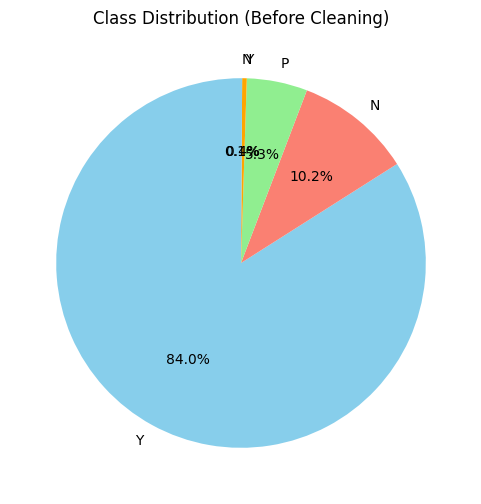

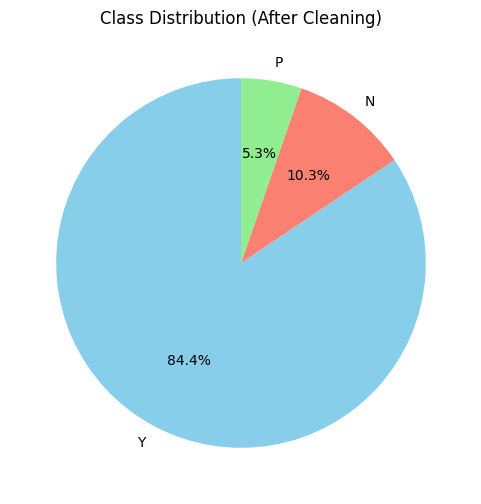

In [114]:
# Plot showing class label distributions (Before Cleaning)
plt.figure(figsize=(6, 6))
df_copy['CLASS'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon', 'lightgreen', 'orange'],
    startangle=90
)
plt.title("Class Distribution (Before Cleaning)")
plt.ylabel('')
plt.show()

# Plot showing class label distributions (After Cleaning)

df_copy['CLASS'] = df_copy['CLASS'].str.strip().str.upper()

plt.figure(figsize=(6, 6))
df_copy['CLASS'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon','lightgreen'],
    startangle=90)
plt.title("Class Distribution (After Cleaning)")
plt.ylabel('')
plt.show()

### 1.4 Distribution of Gender and CLASS

The following bar plots show how many males and females exist in the dataset, and how the samples are distributed among the classes (N, P, Y).


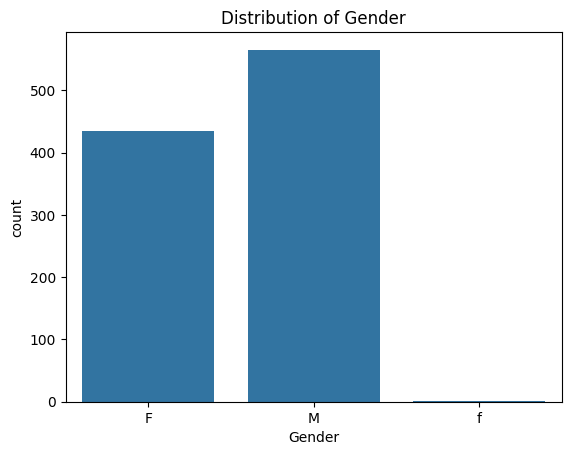

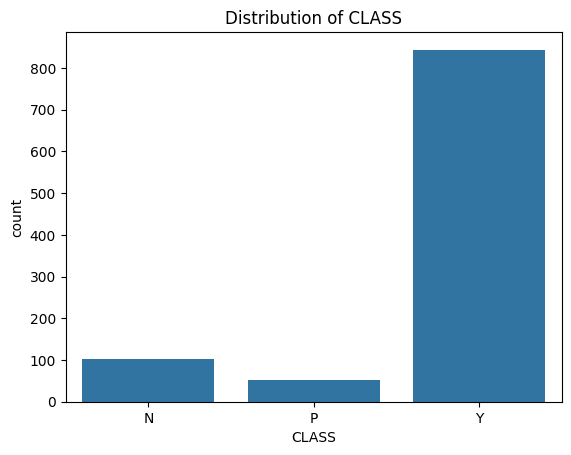

In [115]:
# Bar plot for Gender
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender")
plt.show()

# Bar plot for CLASS
sns.countplot(x='CLASS', data=df)
plt.title("Distribution of CLASS")
plt.show()


**1.5 Missing values:**

In [116]:

# Display missing values count and percentage for each column

missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()
rows_with_missing = df.isnull().sum(axis=1)
print("Rows with missing values:")
print(rows_with_missing);

Missing values in each column:
ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

Rows with missing values:
0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int64


that all attributes (ID, No_Pation, Gender, AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI, and CLASS) have  missing values which is 0 . This indicates that the dataset is complete with no missing data, and therefore no imputation or preprocessing is required for missing values.Note: The ID column is an identifier only and is not used for prediction. It has no missing values, which confirms that all records are properly indexed.

## Part 2: Data Preprocessing  

In this part, we focus on improving the quality and consistency of the dataset before analysis. The preprocessing stage ensures that the data is clean, accurate, and suitable for the next phases of the project.  





**`Overview of Data Preprocessing Tasks`**


1. **Noise Removal:** This process involves identifying and handling missing values, detecting and removing outliers, and deleting duplicate records. These steps reduce data errors and make the dataset more reliable.
2.    **Normalization:** All numerical attributes are scaled to a common range to prevent large values from dominating smaller ones, helping models perform more accurately.


1.   **Correlation Analysis:** The relationships between different attributes are examined to identify how variables are connected and to avoid redundancy.
2.   **Statistical Measures:** Calculating the mean, median, and variance provides a quick understanding of how the data is distributed and whether there are unusual values.


1.    **Discretization and Encoding:** Continuous numerical attributes are divided into categories, and categorical attributes are encoded into numerical form to make the data more suitable for machine learning algorithms.
2.   **Feature Selection and Final Dataset:** The most important features are selected to improve performance and efficiency. After completing all preprocessing steps, the final preprocessed dataset is saved for later use in the project.











###2.1 Noise Removal

Checking for Missing Values

In this part, the dataset is examined to identify whether any attributes contain missing or null values.
Detecting missing values is an important step before performing other preprocessing tasks because missing data can affect the accuracy of the analysis. After running the check, it was found that all attributes in the dataset have zero missing values, which means the dataset is complete. Therefore, there is no need to remove rows with missing data or replace them with average or median values.

In [117]:
#Check for missing values in the entire dataset
missing = df.isna().sum()

#displaying the results
print("Missing values in each column:\n")
print(missing)

print("\ntotal number of missing values in the dataset:",missing.sum())


Missing values in each column:

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

total number of missing values in the dataset: 0


Detecting and Removing Outliers  

In this part, the dataset is checked for extreme values that are far from the normal range.  
Outliers can affect the accuracy of analysis and may lead to incorrect results if not handled properly.  
The mean method is used to identify and remove outliers from the numeric attributes.  
After running the check, only one record in the dataset was found to be an outlier and was removed, reducing the total number of rows from 1000 to 999.  



In [118]:
print("Detecting and Removing Outliers using the Mean Method")

# Select numeric columns to apply the method on
numeric_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
df= df.copy()

for c in numeric_cols:
    col = df[c]

    mean = col.mean()
    differences_from_mean = abs(col - mean)
    max_difference_index = differences_from_mean.idxmax()
    df_no_outlier = df.drop(max_difference_index)


    print("Original DataFrame:")
    print(df.head())
    print("\nDataFrame after removing the row with the largest difference from the mean:")
    print(df_no_outlier.head())


    print("Original shape:", df.shape)
    print("New shape after removing outliers:", df_no_outlier.shape)


Detecting and Removing Outliers using the Mean Method
Original DataFrame:
    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  

DataFrame after removing the row with the largest difference from the mean:
    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  

Detecting and Removing Duplicate Records  

In this part, the dataset is examined to check if any duplicate records exist, which could occur if the same patient’s information was entered more than once.  
After running the check, no duplicate rows were found in the dataset, confirming that each patient record is unique and that the data is already clean and consistent.


In [119]:
# --- Check and Remove Duplicates ---
duplicates = df_no_outlier.duplicated().sum()
print("Number of duplicate rows:", duplicates)

if duplicates > 0:
    df_no_outlier = df_no_outlier.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")



Number of duplicate rows: 0
No duplicate rows found.


# **Discretization**

In [120]:
#Discretization for column (Age)
columns_to_Discretize = 'AGE'

#The boundaries of the bins
bns = [0, 30 , 50 , 100]

#Labels for the age groups
labls = ['0-30' , '31-50' , '51-100']

#Perform discretization using cut function
df['AgeGroup'] = pd.cut(df[columns_to_Discretize] , bins=bns , labels= labls )

#Display the Discretizied columns
print("original DataFrame:")
print(df[['AGE' ,'AgeGroup']])

original DataFrame:
     AGE AgeGroup
0     50    31-50
1     26     0-30
2     50    31-50
3     50    31-50
4     33    31-50
..   ...      ...
995   71   51-100
996   31    31-50
997   30     0-30
998   38    31-50
999   54   51-100

[1000 rows x 2 columns]


We applied **discretization** to the "**Age**" column, grouping it into meaningful ranges: [0–30, 31–50, 51–100]. This reduces noise, makes the data easier to interpret, and helps the model capture patterns more effectively than using raw continuous values.

### **Encoding**

In [121]:
le = LabelEncoder()
df_copy['Gender'] = le.fit_transform(df['Gender'])
df_copy['CLASS'] = le.fit_transform(df['CLASS'])
print(df)

      ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...    ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317      M   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI CLASS AgeGroup  
0    24.0     N    31-50

**Encoding** was applied to the "**CLASS**" and "**Gender**" columns, converting their categorical values into numeric form. This ensures all data is numeric, consistent, and ready for analysis and modeling.